# ON34 Python S07 Banco de dados I - Exercicio de casa

Esse documento tem como objetivo passar passo a passo de um exercício que deverá ser feito após de Bando de dados I.

## Caso pessoal

Pense no seu dia a dia, o que poderia se aproveitar de uma arquitetura de banco de dados para organizar as informações? (e as idéias).



Nos dias atuais, muitos de nós fazemos celebrações como chás de bebês, casamentos, chá revelação, 15 anos entre outros.
**E** para uma empresa, que atua neste ramo imagina o quão seja desafiador estruturar, compromissos, tarefas e as demandas.

## Desafio 1

Traga um caso de uso que identificou em seu dia a dia. Explique o motivo dos dados precisarem de organização e quais as informações que espera ter uma vez que esses forem organizados.

Resposta esperada: Um texto de no minimo 2 parágrafos com sua necessidade de negócio e ao menos 3 perguntas a serem respondidas pela organização dos dados.



Regras de Negócio a serem atendidas neste banco: quem são os convidados e suas preferências, qual é o status das compras e preparativos, e como esta o andamento para controle de gastos pontuais.

Regras de Negócio a serem atendidas neste banco: quem são os convidados e suas preferências, qual é o status das compras e preparativos, e como esta o andamento para controle de gastos pontuais.
**negrito**

## Desafio 2

Estruture uma arquitetura de ao menos 3 entidades contando com chaves primárias e estrangeiras para solucionar o problema inicial.

Resposta esperada: Um desenho de tabelas e suas relações, indicação de qual modelo de estrutura escolheu.

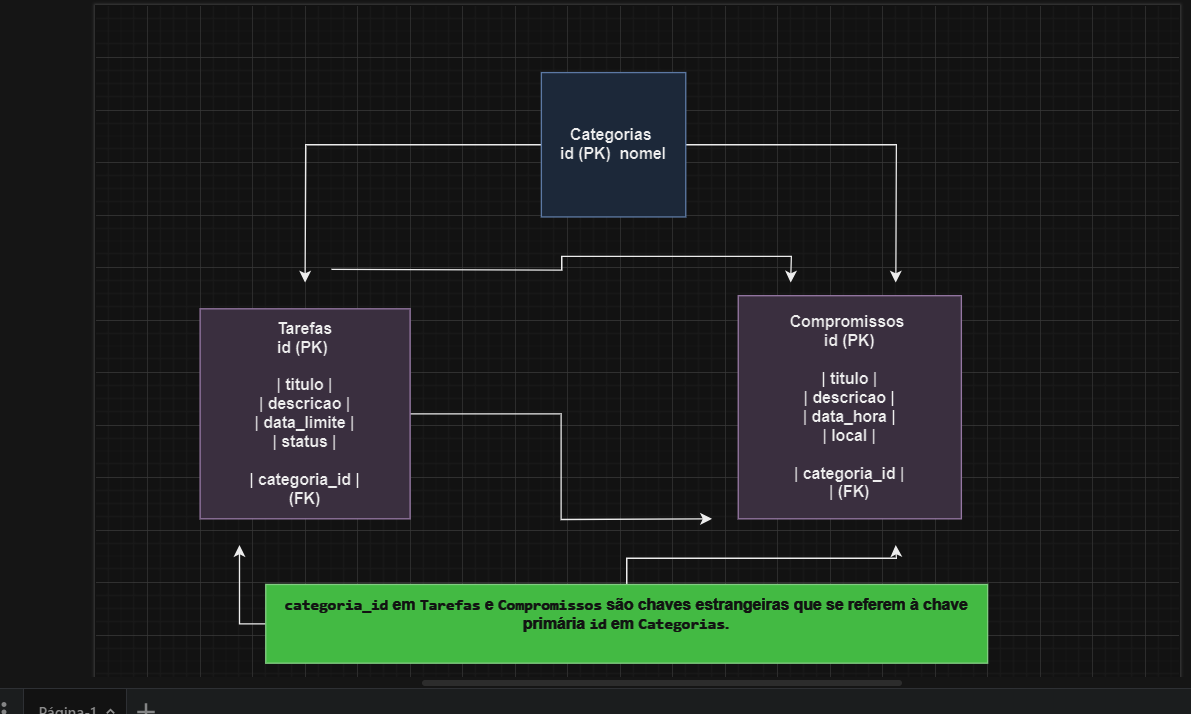

## Desafio 3

Crie toda a estrutura desenhada e popule as tabelas citadas.

Resposta esperada: Respostas de acordo com o desenho e o preenchimento feito.


In [ ]:

import sqlite3
import pandas as pd

# Conectar ao banco de dados (ou criar um novo)
conn = sqlite3.connect('meu_banco_de_dados.db')
cursor = conn.cursor()


# Criação da tabela Categorias
cursor.execute('''
CREATE TABLE IF NOT EXISTS Categorias (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT UNIQUE NOT NULL
)
''')

# Criação da tabela Tarefas
cursor.execute('''
CREATE TABLE IF NOT EXISTS Tarefas (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    titulo TEXT NOT NULL,
    descricao TEXT,
    data_limite DATE,
    status TEXT,
    categoria_id INTEGER,
    FOREIGN KEY (categoria_id) REFERENCES Categorias(id)
)
''')

# Criação da tabela Compromissos
cursor.execute('''
CREATE TABLE IF NOT EXISTS Compromissos (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    titulo TEXT NOT NULL,
    descricao TEXT,
    data_hora DATETIME,
    local TEXT,
    categoria_id INTEGER,
    FOREIGN KEY (categoria_id) REFERENCES Categorias(id)
)
''')

# Desafio_3/ População das Tabelas

# Inserção de dados na tabela Categorias
categorias = [('Pessoal',), ('Trabalho',), ('Lazer',), ('Chá de Bebê',)]
cursor.executemany('''
INSERT OR IGNORE INTO Categorias (nome) VALUES (?)
''', categorias)

# Obter o ID da categoria "Chá de Bebê"
cursor.execute("SELECT id FROM Categorias WHERE nome = 'Chá de Bebê'")
cha_de_bebe_id = cursor.fetchone()[0]

# Inserção de dados na tabela Tarefas
tarefas = [
    ('Comprar decoração', 'Comprar balões e enfeites', '2024-08-01', 'Pendente', cha_de_bebe_id),
    ('Convidar amigos', 'Enviar convites para amigos', '2024-07-25', 'Pendente', cha_de_bebe_id),
    ('Organizar jogos', 'Preparar jogos para o evento', '2024-08-05', 'Em andamento', cha_de_bebe_id)
]
cursor.executemany('''
INSERT OR IGNORE INTO Tarefas (titulo, descricao, data_limite, status, categoria_id) VALUES (?, ?, ?, ?, ?)
''', tarefas)

# Inserção de dados na tabela Compromissos
compromissos = [
    ('Reservar salão', 'Reservar o salão de festas', '2024-07-30 14:00:00', 'Salão Festas', cha_de_bebe_id),
    ('Reunião de planejamento', 'Reunião com organizadores', '2024-07-22 10:00:00', 'Casa da Maria', cha_de_bebe_id)
]
cursor.executemany('''
INSERT OR IGNORE INTO Compromissos (titulo, descricao, data_hora, local, categoria_id) VALUES (?, ?, ?, ?, ?)
''', compromissos)

# Commit das mudanças
conn.commit()


## Desafio 4

Se deixe errar e corrigir. Mostre ajustes que teve que fazer depois da estrutura completa.

Resposta esperada: Use o metodo UPDATE, DROP ou ALTER para modificar sua estrutura.


In [ ]:

# Atualizações na Estrutura

# Atualização de uma tarefa para corrigir um erro de descrição
cursor.execute('''
UPDATE Tarefas
SET descricao = 'Comprar balões, enfeites e bandeirolas'
WHERE titulo = 'Comprar decoração' AND categoria_id = ?
''', (cha_de_bebe_id,))

# Desafio_4/ Adicionando uma correção em uma tarefa

cursor.execute('''
UPDATE Tarefas
SET descricao = 'Enviar convites para todos os amigos e familiares'
WHERE titulo = 'Convidar amigos' AND categoria_id = ?
''', (cha_de_bebe_id,))

# Commit das mudanças
conn.commit()


## Desafio 5

Responda suas dúvidas de negócio com os dados que levantou.

Resposta esperada: Crie consultas para entender melhor seus dados, ao menos 3 consultas relacionadas as dúvidas iniciais.


In [ ]:

# Listar Tarefas e Compromissos de Chá de Bebê

# Obter tarefas de Chá de Bebê
tarefas_cha_de_bebe = pd.read_sql_query('''
SELECT titulo, descricao, data_limite, status
FROM Tarefas
WHERE categoria_id = ?
''', conn, params=(cha_de_bebe_id,))

# Obter compromissos de Chá de Bebê
compromissos_cha_de_bebe = pd.read_sql_query('''
SELECT titulo, descricao, data_hora, local
FROM Compromissos
WHERE categoria_id = ?
''', conn, params=(cha_de_bebe_id,))

# Fechar a conexão
conn.close()

## Desafio_5 / rodando banco de acordo as regras de negócios:

# Imprimir as listas de forma simples
print("Tarefas de Chá de Bebê:")
print(tarefas_cha_de_bebe)

print("\nCompromissos de Chá de Bebê:")
print(compromissos_cha_de_bebe)

In [2]:
##Segue código completo atendendo as regras de negócios proposto no banco de dados para esta empresa de eventos:

import sqlite3
import pandas as pd

# Conectar ao banco de dados (ou criar um novo)
conn = sqlite3.connect('meu_banco_de_dados.db')
cursor = conn.cursor()


# Criação da tabela Categorias
cursor.execute('''
CREATE TABLE IF NOT EXISTS Categorias (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT UNIQUE NOT NULL
)
''')

# Criação da tabela Tarefas
cursor.execute('''
CREATE TABLE IF NOT EXISTS Tarefas (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    titulo TEXT NOT NULL,
    descricao TEXT,
    data_limite DATE,
    status TEXT,
    categoria_id INTEGER,
    FOREIGN KEY (categoria_id) REFERENCES Categorias(id)
)
''')

# Criação da tabela Compromissos
cursor.execute('''
CREATE TABLE IF NOT EXISTS Compromissos (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    titulo TEXT NOT NULL,
    descricao TEXT,
    data_hora DATETIME,
    local TEXT,
    categoria_id INTEGER,
    FOREIGN KEY (categoria_id) REFERENCES Categorias(id)
)
''')

# Desafio_3/ População das Tabelas

# Inserção de dados na tabela Categorias
categorias = [('Pessoal',), ('Trabalho',), ('Lazer',), ('Chá de Bebê',)]
cursor.executemany('''
INSERT OR IGNORE INTO Categorias (nome) VALUES (?)
''', categorias)

# Obter o ID da categoria "Chá de Bebê"
cursor.execute("SELECT id FROM Categorias WHERE nome = 'Chá de Bebê'")
cha_de_bebe_id = cursor.fetchone()[0]

# Inserção de dados na tabela Tarefas
tarefas = [
    ('Comprar decoração', 'Comprar balões e enfeites', '2024-08-01', 'Pendente', cha_de_bebe_id),
    ('Convidar amigos', 'Enviar convites para amigos', '2024-07-25', 'Pendente', cha_de_bebe_id),
    ('Organizar jogos', 'Preparar jogos para o evento', '2024-08-05', 'Em andamento', cha_de_bebe_id)
]
cursor.executemany('''
INSERT OR IGNORE INTO Tarefas (titulo, descricao, data_limite, status, categoria_id) VALUES (?, ?, ?, ?, ?)
''', tarefas)

# Inserção de dados na tabela Compromissos
compromissos = [
    ('Reservar salão', 'Reservar o salão de festas', '2024-07-30 14:00:00', 'Salão Festas', cha_de_bebe_id),
    ('Reunião de planejamento', 'Reunião com organizadores', '2024-07-22 10:00:00', 'Casa da Maria', cha_de_bebe_id)
]
cursor.executemany('''
INSERT OR IGNORE INTO Compromissos (titulo, descricao, data_hora, local, categoria_id) VALUES (?, ?, ?, ?, ?)
''', compromissos)

# Commit das mudanças
conn.commit()

# Atualizações na Estrutura

# Atualização de uma tarefa para corrigir um erro de descrição
cursor.execute('''
UPDATE Tarefas
SET descricao = 'Comprar balões, enfeites e bandeirolas'
WHERE titulo = 'Comprar decoração' AND categoria_id = ?
''', (cha_de_bebe_id,))

# Desafio_4/ Adicionando uma correção em uma tarefa

cursor.execute('''
UPDATE Tarefas
SET descricao = 'Enviar convites para todos os amigos e familiares'
WHERE titulo = 'Convidar amigos' AND categoria_id = ?
''', (cha_de_bebe_id,))

# Commit das mudanças
conn.commit()

# Listar Tarefas e Compromissos de Chá de Bebê

# Obter tarefas de Chá de Bebê
tarefas_cha_de_bebe = pd.read_sql_query('''
SELECT titulo, descricao, data_limite, status
FROM Tarefas
WHERE categoria_id = ?
''', conn, params=(cha_de_bebe_id,))

# Obter compromissos de Chá de Bebê
compromissos_cha_de_bebe = pd.read_sql_query('''
SELECT titulo, descricao, data_hora, local
FROM Compromissos
WHERE categoria_id = ?
''', conn, params=(cha_de_bebe_id,))

# Fechar a conexão
conn.close()

## Desafio_5 / rodando banco de acordo as regras de negócios:

# Imprimir as listas de forma simples
print("Tarefas de Chá de Bebê:")
print(tarefas_cha_de_bebe)

print("\nCompromissos de Chá de Bebê:")
print(compromissos_cha_de_bebe)


Tarefas de Chá de Bebê:
              titulo                                          descricao  \
0  Comprar decoração             Comprar balões, enfeites e bandeirolas   
1    Convidar amigos  Enviar convites para todos os amigos e familiares   
2    Organizar jogos                       Preparar jogos para o evento   

  data_limite        status  
0  2024-08-01      Pendente  
1  2024-07-25      Pendente  
2  2024-08-05  Em andamento  

Compromissos de Chá de Bebê:
                    titulo                   descricao            data_hora  \
0           Reservar salão  Reservar o salão de festas  2024-07-30 14:00:00   
1  Reunião de planejamento   Reunião com organizadores  2024-07-22 10:00:00   

           local  
0   Salão Festas  
1  Casa da Maria  
